In [1]:
import numpy as np

In [2]:
import pandas as pd

In [31]:
from numpy.linalg import inv

In [93]:
import matplotlib.pyplot as plt

In [94]:
%matplotlib inline

In [15]:
mu, sigma = 0, 1 # mean and standard deviation

In [49]:
x = np.random.normal(mu, sigma,(1000,100))
x.shape

(1000, 100)

In [47]:
beta_true = np.random.normal(mu, sigma, (100,1))
beta_true[0:10]

array([[-1.22509066],
       [ 1.41265004],
       [ 0.01233006],
       [ 0.39468834],
       [ 1.28084363],
       [-0.86847409],
       [ 0.38142269],
       [-0.74848863],
       [ 0.00725763],
       [-0.51509125]])

In [44]:
bias = np.random.normal(0,0.5,(1000,1))
bias[0:10]

array([[ 0.11787654],
       [-0.26515798],
       [ 0.23579029],
       [ 0.27095194],
       [-0.50178798],
       [-0.78161315],
       [-0.35437543],
       [ 0.1621519 ],
       [ 1.0968892 ],
       [ 0.16657835]])

In [43]:
y = np.matmul(x,beta_true)+bias
y[0:10]

array([[ 16.64801226],
       [ -9.92323383],
       [  3.94244864],
       [ -2.41323676],
       [ -5.03668922],
       [ -0.94640725],
       [  5.5747585 ],
       [  1.51666272],
       [ -8.41048762],
       [-15.81587676]])

# Parte 1: Solución Cerrada

In [42]:
beta_optimo_cerrado = np.matmul(np.matmul(inv(np.matmul(x.T,x)),x.T),y)
beta_optimo_cerrado[0:10]

array([[-1.77222613],
       [-0.69908829],
       [-0.13616245],
       [ 0.93929289],
       [ 0.14600231],
       [ 0.20046444],
       [-0.34027171],
       [ 0.48707347],
       [ 1.55970483],
       [ 0.68292698]])

# ¿Por que en la practica no se utiliza este metodo?

# Parte 2: GD

In [59]:
w_nulo = np.zeros((101,1))
w_nulo.shape

(101, 1)

In [130]:
def GD(ye,w,equis,tol=0.1,epochs=20,lr=0.1):
    
    unos = np.ones_like(y)
    features = np.hstack((equis,unos))
    
    nor_gradiente = 100
    i = 0 
    
    iteracion_k = []
    w_k = []
    pk = []
    norma_k = []
    
    cur_w = w
    
    while nor_gradiente > tol and i < epochs:
     
        prev_w = cur_w
        
        ## Gradiente descendente
        cur_w = cur_w - (lr * (-2 * np.matmul(features.T,ye) + 2 * np.matmul(np.matmul(features.T,features),prev_w)))
    
        ## Calculando el valor del grandiente
        gradiente = -2 * np.matmul(features.T,ye) + 2 * np.matmul(np.matmul(features.T,features),prev_w)
        
        ## Calculando la norma del gradiente         
        nor_gradiente = np.linalg.norm(gradiente)
        
        i = i+1
            
        iteracion_k.append(i)
        w_k.append(cur_w)
        pk.append(gradiente) 
        norma_k.append(nor_gradiente)

    

        #print("Iteracion: ", i)
        #print("x_inicial: ", x_inicial)
        #print("gradiente: ", gradiente)
            
    print("Norma del Gradiente: ", nor_gradiente)
    print("Forma del gradiente: ", gradiente.shape)
    
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(iteracion_k,norma_k)
    plt.show()
        
    
    TableOut = pd.DataFrame({'Iteración k':iteracion_k, 'W_k':w_k, 'Dirección': pk, 'Norma': norma_k})
    return TableOut, iteracion_k, norma_k 
    print(gradiente.shape)

Norma del Gradiente:  0.0010991311545346407
Forma del gradiente:  (101, 1)


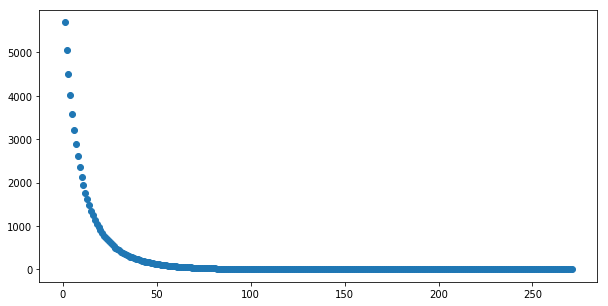

,Iteración k,W_k,Dirección,Norma
0,1,"[[0.026604421112827153], [0.0352594151271325],...","[[-532.088422256543], [-705.18830254265], [-28...",5693.121090
1,2,"[[0.04984064093567646], [0.06749994262588854],...","[[-464.7243964569861], [-644.8105499751209], [...",5052.750205
2,3,"[[0.07014135104673495], [0.09703115150189316],...","[[-406.0142022211698], [-590.6241775200923], [...",4496.440433
3,4,"[[0.08788193562723573], [0.1241259543056751], ...","[[-354.8116916100154], [-541.8960560756389], [...",4012.173345
4,5,"[[0.10338829250875489], [0.14902532583009995],...","[[-310.1271376303833], [-497.987430488497], [-...",3589.719033
5,6,"[[0.11694356190856652], [0.17194239407838705],...","[[-271.1053879962324], [-458.34136496574195], ...",3220.364600
6,7,"[[0.12879391775278898], [0.19306598689832172],...","[[-237.00711688444915], [-422.47185639869355],...",2896.684603
7,8,"[[0.13915355432850574], [0.21256370689466855],...","[[-207.19273151433538], [-389.9543999269366], ...",2612.346800
8,9,"[[0.14820898202982774], [0.23058459776675988],...","[[-181.10855402644034], [-360.41781744182623],...",2361.947663
9,10,"[[0.15612272971166077], [0.2472614569270724], ...","[[-158.27495363666083], [-333.53718320625075],...",2140.872974


In [138]:
T_1, i_1, nor_1 = GD(y,w_nulo,x,tol=0.001102,epochs=300,lr=0.00005)
T_1

Norma del Gradiente:  0.0007762810773078064
Forma del gradiente:  (101, 1)


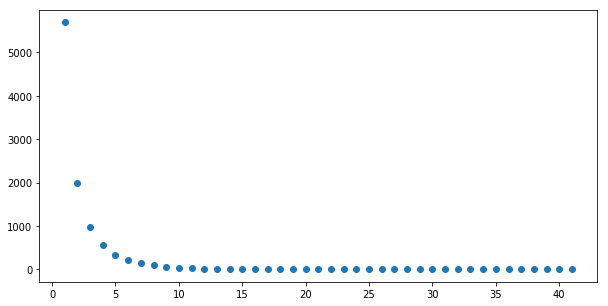

,Iteración k,W_k,Dirección,Norma
0,1,"[[0.26604421112827153], [0.35259415127132504],...","[[-532.088422256543], [-705.18830254265], [-28...",5693.121090
1,2,"[[0.19526829325875827], [0.40329953970500465],...","[[141.5518357390265], [-101.41077686735923], [...",1989.276743
2,3,"[[0.22036382457849316], [0.46168517092605876],...","[[-50.19106263946975], [-116.7712624421082], [...",989.220802
3,4,"[[0.20094841373510156], [0.47075549959689356],...","[[38.830821686783224], [-18.140657341669566], ...",558.288432
4,5,"[[0.20567042953401346], [0.47882017272594024],...","[[-9.444031597823823], [-16.129346258093392], ...",338.184904
5,6,"[[0.2020017885614273], [0.483634356816705], [0...","[[7.337281945172322], [-9.628368181529595], [-...",214.624116
6,7,"[[0.2027161364773645], [0.4827657637738516], [...","[[-1.4286958318743928], [1.7371860857068668], ...",140.612178
7,8,"[[0.20219468864975101], [0.485783902797672], [...","[[1.042895655226971], [-6.036278047640735], [-...",94.148373
8,9,"[[0.20218195748673934], [0.4840811614845875], ...","[[0.025462326023330206], [3.4054826261689186],...",63.981545
9,10,"[[0.20219776353888608], [0.48587283479163307],...","[[-0.03161210429345829], [-3.583346614091056],...",43.926541


In [135]:
T_2, i_2, nor_2 = GD(y,w_nulo,x,tol=0.001102,epochs=45,lr=0.0005)
T_2

Norma del Gradiente:  483577.0925434817
Forma del gradiente:  (101, 1)


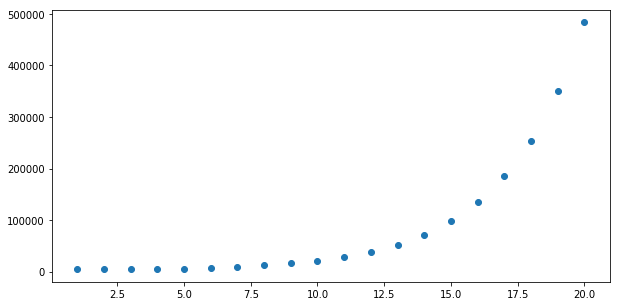

,Iteración k,W_k,Dirección,Norma
0,1,"[[0.3724618955795801], [0.49363181177985505], ...","[[-532.088422256543], [-705.18830254265], [-28...",5693.121090
1,2,"[[0.0847563383235021], [0.3955616483979253], [...","[[411.00793893725427], [140.10023340275677], [...",4205.679740
2,3,"[[0.32418901877698403], [0.5552468612892646], ...","[[-342.0466863621171], [-228.12173270191334], ...",4311.278142
3,4,"[[0.07654466610265723], [0.4139504229109523], ...","[[353.7776466776097], [201.85205482616038], [-...",4907.234857
4,5,"[[0.33243398952729575], [0.5425696549943398], ...","[[-365.55617632091213], [-183.74176011912505],...",5902.160173
5,6,"[[0.0690385287105933], [0.45295371956470937], ...","[[376.27922973814634], [128.02276489947212], [...",7349.142731
6,7,"[[0.3357770977834722], [0.4737334982870719], [...","[[-381.05509867554133], [-29.685398174803595],...",9374.790505
7,8,"[[0.07107088683907875], [0.5673599484205161], ...","[[378.15172992056205], [-133.75207161920605], ...",12175.636734
8,9,"[[0.32641063724404995], [0.2938523007018777], ...","[[-364.7710720071017], [390.7252110266263], [4...",16032.963443
9,10,"[[0.09049822886286993], [0.8420652964695299], ...","[[337.0177262588286], [-783.1614225252173], [-...",21340.189871


In [136]:
T_3, i_3, nor_3 = GD(y,w_nulo,x,tol=0.001102,epochs=20,lr=0.0007)
T_3

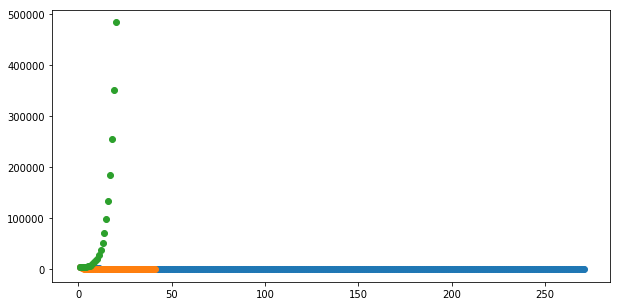

In [137]:
## Gráfica 
fig  = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(i_1,nor_1)
ax1.scatter(i_2,nor_2)
ax1.scatter(i_3,nor_3)
plt.show()

# Parte 3: SGD

# Parte 4: MBGD

# Parte 5: Comparación

In [54]:
unos = np.ones_like(y)
unos.shape


(1000, 1)

In [65]:
np.hstack((x,unos)).shape

(1000, 101)